<a href="https://colab.research.google.com/github/mohangiri1/MachineLearning/blob/main/LinearRegression/California_Housing_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price prediction using linear regression model from sci-kit Learning:

Load the required packages as below.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Load the data from a git repository as I am trying to reproduce the result on [Here](https://github.com/LinkedInLearning/artificial-intelligence-foundations-machine-learning-3067770/blob/main/LiL-HomePrediction.ipynb).

Data is directly obtained from [Here](https://raw.githubusercontent.com/LinkedInLearning/artificial-intelligence-foundations-machine-learning-3067770/refs/heads/main/housing.csv).

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/artificial-intelligence-foundations-machine-learning-3067770/refs/heads/main/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Let us explore the details of the data:

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Data contains 20640 rows and 10 columns. Eventhough df contains 10 columns, df.describe() displays only 9 columns as they contain numeric value. The remaining column 'ocean_proximity' datatype is object so is not displayed here.

All Columns are namely:

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Let us explore the data types of each columns to verify:

In [9]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


# Data Preparation:
Now let us explore if the data contains any nan values / missig values.

In [14]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


Here, False means it does not have nan values. However, since, data is very large, it is hard to see where there is True. So, instead of displaying all df, we display how many nan values are there in each columns as below.

In [15]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


So, we have nan values only for the column 'total_bedrooms' in 207 rows out of 20640 rows.

### Note:
Eventhough 'total_bedrooms' contains nan values, df is showing it's datatype as float64. It looks like nan values are also considered as numeric values.

In [16]:
# Calculate the % of missing values.
df.isna().sum()/len(df)*100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.002907
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


### Now Let us fill in the nan values / missing values from our data using impute using mean.

In [44]:
df_temp = df.copy() # Copy the data and give a new variable name for dataframe.
df_temp.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace=True)
df_temp.isna().sum()

<ipython-input-44-c6100e1447f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace=True)


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
df_temp.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We compared the data and we haven't changed the overall data by imputing missing values with mean.

# Data Visualization and Finding out the trends:

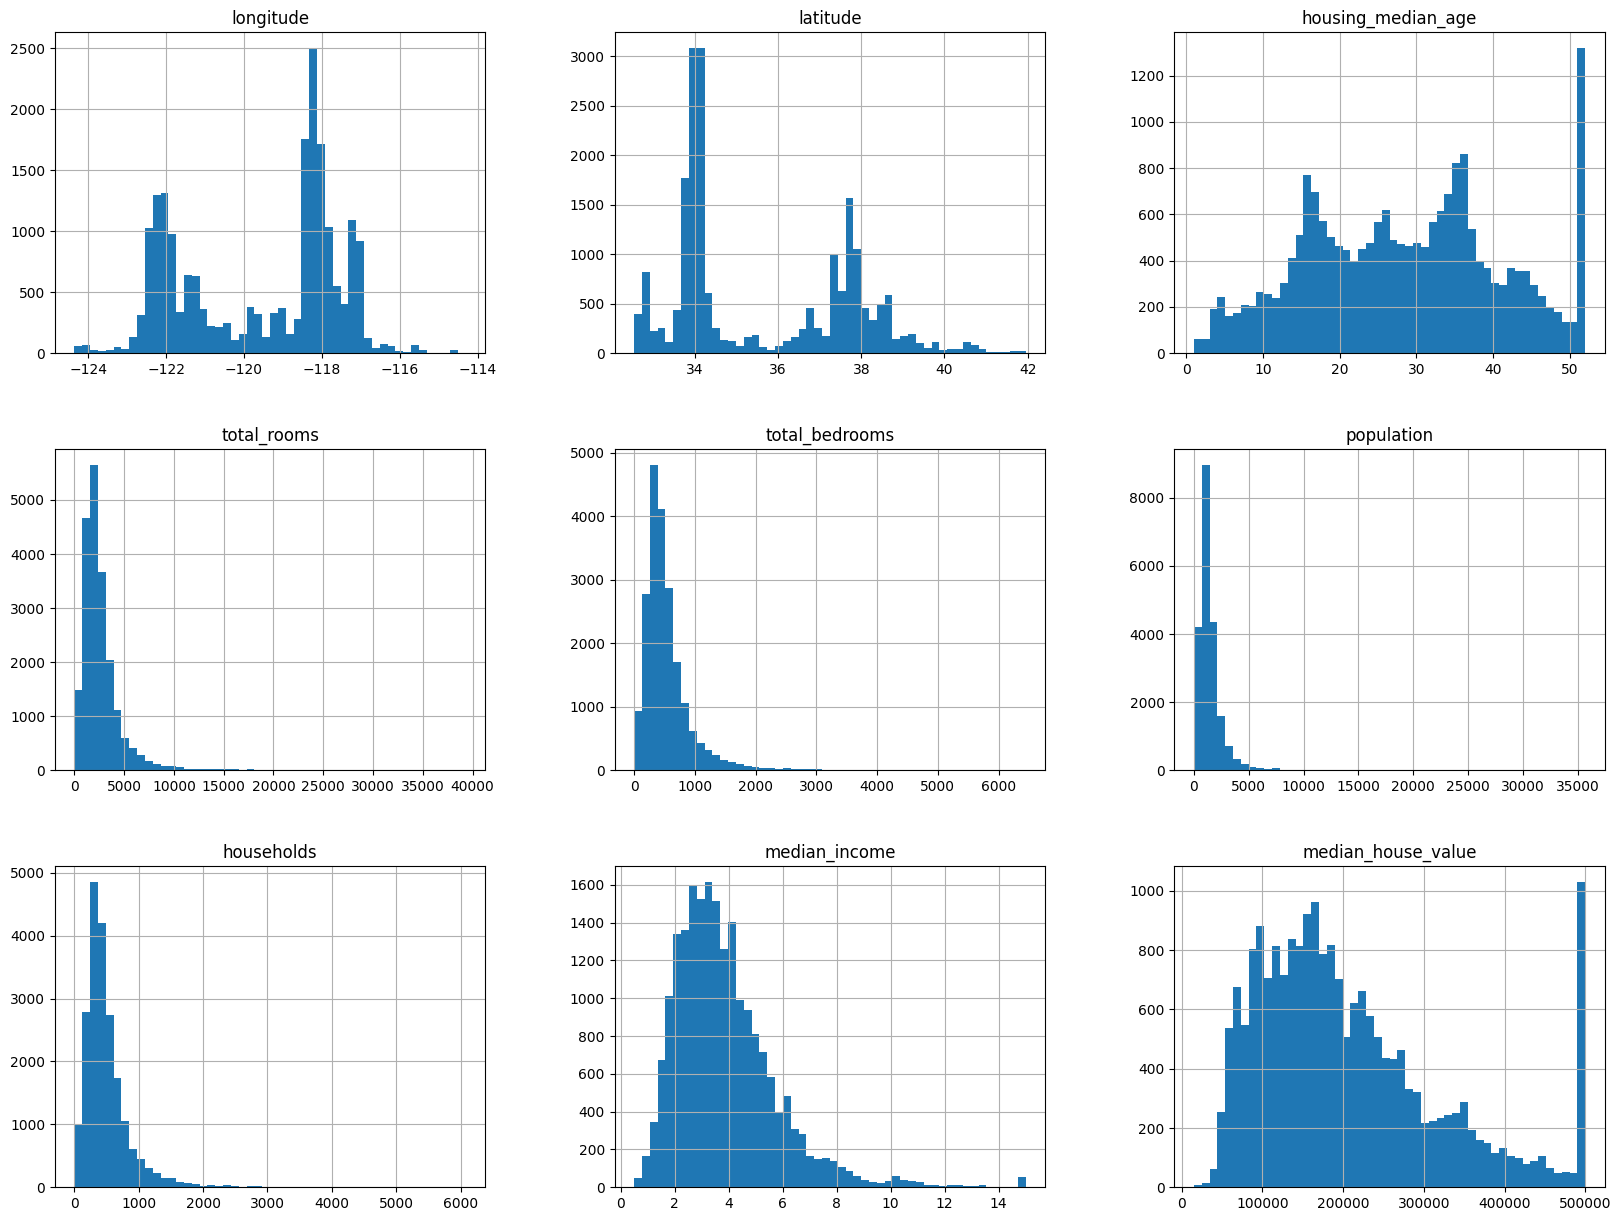

In [20]:
df_temp.hist(bins=50, figsize=(20,15))
plt.show()

Our target variable is 'median_house_value'. So, look at the last histogram. The distribution is mainly concentrated between 100,000 - 200,000.

In order to see the summary, let us use box plot to understand more including the outliers.

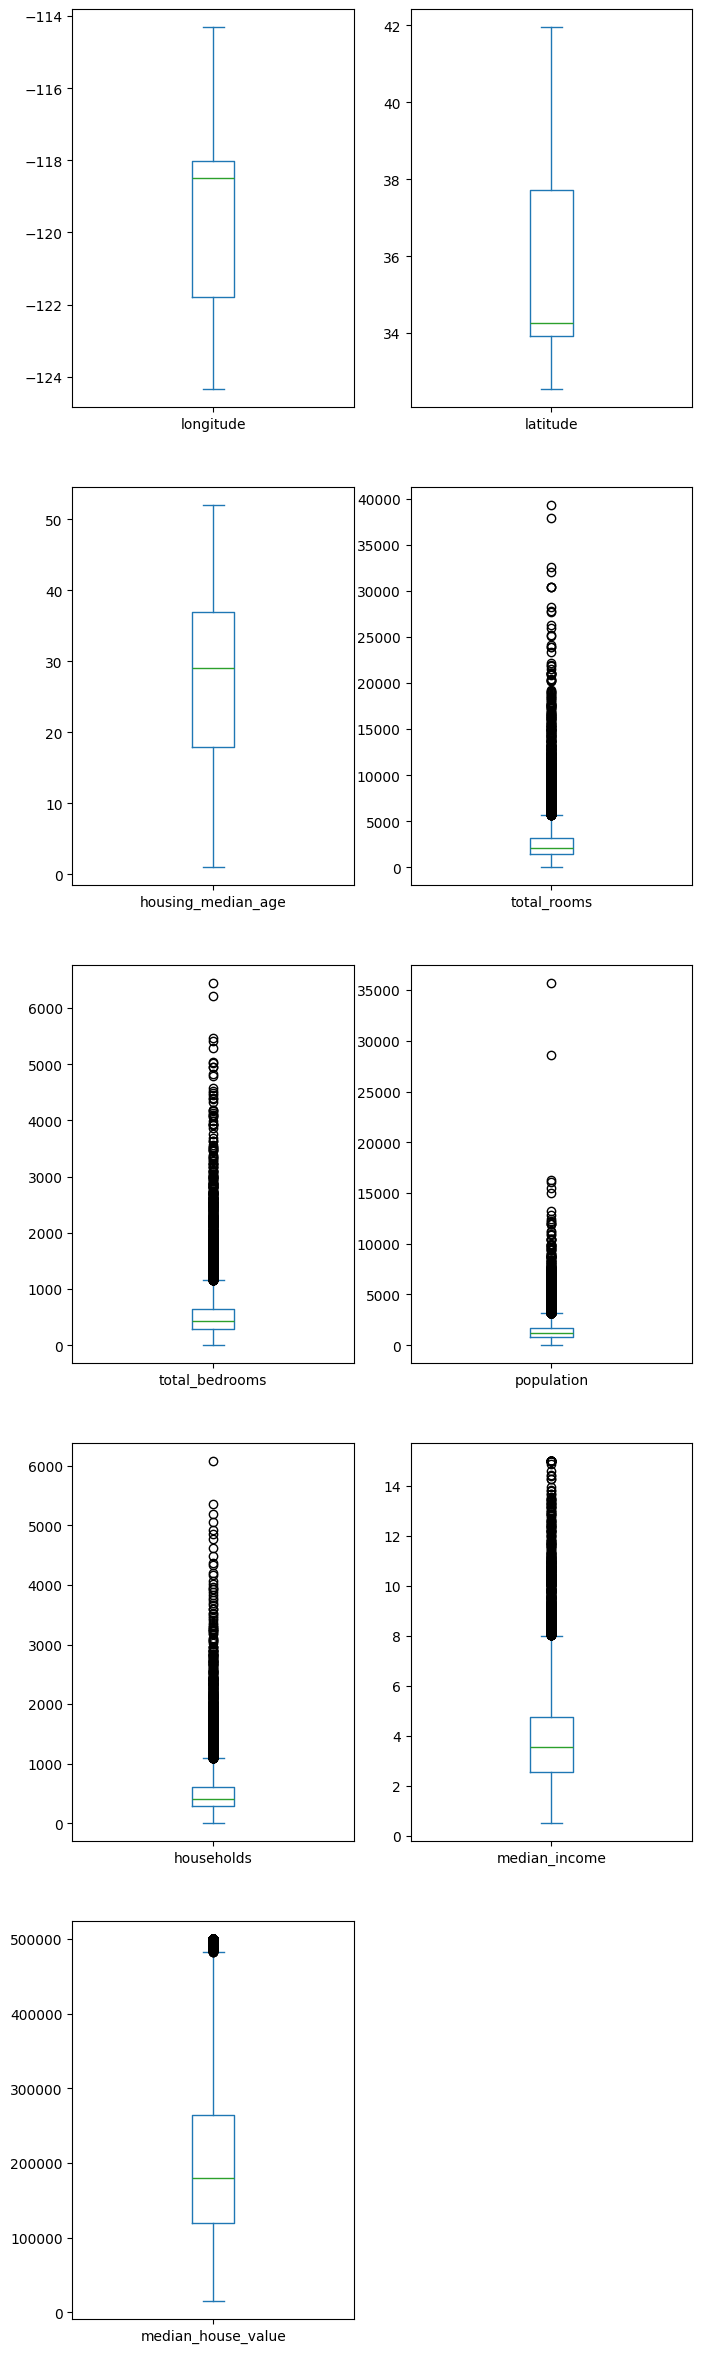

In [29]:
df_temp.plot(kind='box', subplots=True, layout=(5,2), figsize=(8,30))
plt.show()

Now let us see how each are correlated.

In [34]:
corr = df_temp.corr(numeric_only=True)
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


Let us see visually as well with the help of heatmap from seaborn package.

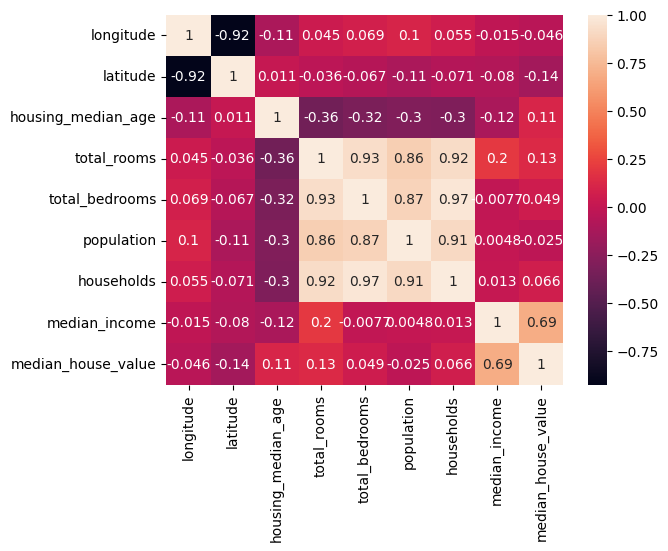

In [35]:
sns.heatmap(corr, annot=True)
plt.show()

Here, our target variable 'median_house_value' is correlated mostly with 'median_income'. In addition to this, few features are showing more correlation with each other.

For instance, 'total_rooms' with 'total_bedrooms', 'population' and 'households'. Similarly 'total_bedrooms', 'population' and 'households'.

Also, 'lattitudes' and 'longitudes' are highly negatively correlated.

# Feature Engineering and Feature Selection:
now we create new features associated with the higly correlated features with each other.

In [45]:
df_temp['total_rooms_per_household'] = df_temp['total_rooms']/df_temp['households']
df_temp['population_per_household'] = df_temp['population']/df_temp['households']
df_temp['bedrooms_per_room'] = df_temp['total_bedrooms']/df_temp['total_rooms']
df_temp['geo_location'] = df_temp['latitude'] * df_temp['longitude']
df_temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_household,population_per_household,bedrooms_per_room,geo_location
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,-4630.0724
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,-4627.2492
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,-4626.7840
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,-4627.1625
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,-4627.1625


In [46]:
df_temp.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_household,population_per_household,bedrooms_per_room,geo_location
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,3.070655,0.214478,-4264.448003
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,2.474173,10.386050,0.069764,323.904337
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.045937,-5207.673000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,2.429741,0.175364,-4601.026500
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,2.818116,0.203314,-4060.278900
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,3.282261,0.240255,-4004.349775
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,3.492666,-3753.968400


Now, we remove the correlated features from our data set.

In [47]:
df_temp = df_temp.drop(['total_rooms', 'population', 'total_bedrooms', 'households', 'latitude', 'longitude'], axis=1)
df_temp.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,total_rooms_per_household,population_per_household,bedrooms_per_room,geo_location
0,41.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,-4630.0724
1,21.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,-4627.2492
2,52.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,-4626.7840
3,52.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,-4627.1625
4,52.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,-4627.1625


In [48]:
df_temp.describe()

,housing_median_age,median_income,median_house_value,total_rooms_per_household,population_per_household,bedrooms_per_room,geo_location
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,206855.816909,5.429000,3.070655,0.214478,-4264.448003
std,12.585558,1.899822,115395.615874,2.474173,10.386050,0.069764,323.904337
min,1.000000,0.499900,14999.000000,0.846154,0.692308,0.045937,-5207.673000
25%,18.000000,2.563400,119600.000000,4.440716,2.429741,0.175364,-4601.026500
50%,29.000000,3.534800,179700.000000,5.229129,2.818116,0.203314,-4060.278900
75%,37.000000,4.743250,264725.000000,6.052381,3.282261,0.240255,-4004.349775
max,52.000000,15.000100,500001.000000,141.909091,1243.333333,3.492666,-3753.968400


Now check again the correlation to verify features are not correlated highly.

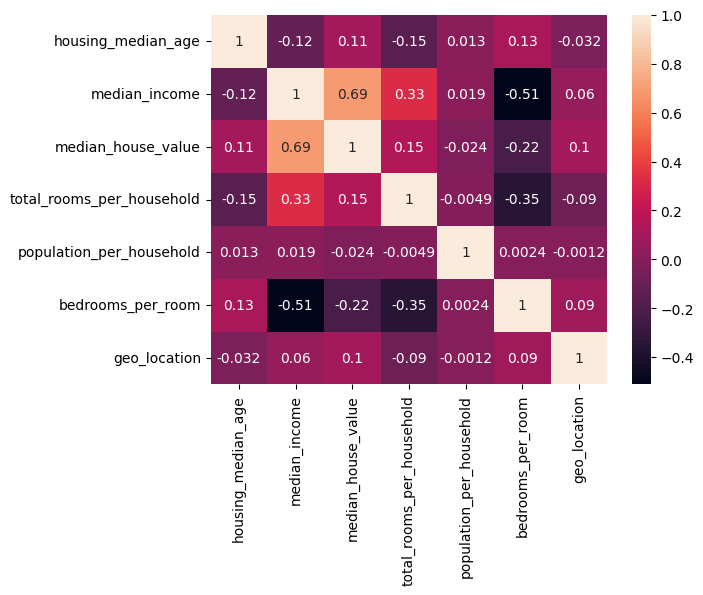

In [52]:
corr = df_temp.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

# Encoding the categorical Data into the numeric data:

In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   housing_median_age         20640 non-null  float64
 1   median_income              20640 non-null  float64
 2   median_house_value         20640 non-null  float64
 3   ocean_proximity            20640 non-null  object 
 4   total_rooms_per_household  20640 non-null  float64
 5   population_per_household   20640 non-null  float64
 6   bedrooms_per_room          20640 non-null  float64
 7   geo_location               20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


Since, ML algorithm handles only the numeric data, we should convert our 'ocean_proximity' object data into numeric data. We can do this by following way.

In [50]:
df_temp['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [51]:
df_temp['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Let us do the one-hot encoding using pandas get_dummies function.

In [53]:
df_encoded = pd.get_dummies(df_temp, columns=['ocean_proximity'])
df_encoded.head()

,housing_median_age,median_income,median_house_value,total_rooms_per_household,population_per_household,bedrooms_per_room,geo_location,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,2.555556,0.146591,-4630.0724,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,2.109842,0.155797,-4627.2492,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,2.802260,0.129516,-4626.7840,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,2.547945,0.184458,-4627.1625,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,2.181467,0.172096,-4627.1625,False,False,False,True,False


In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   total_rooms_per_household   20640 non-null  float64
 4   population_per_household    20640 non-null  float64
 5   bedrooms_per_room           20640 non-null  float64
 6   geo_location                20640 non-null  float64
 7   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 8   ocean_proximity_INLAND      20640 non-null  bool   
 9   ocean_proximity_ISLAND      20640 non-null  bool   
 10  ocean_proximity_NEAR BAY    20640 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB


Here, the column names contain upper case, spaces, symbol like < etc. So we need to rename them. Let's do it.

In [59]:
df_processed = df_encoded.copy() # First copy the dataframe upto this stage.
df_processed.columns = df_processed.columns.str.replace(' ', '_')
df_processed.columns = df_processed.columns.str.replace('<', 'less_')
df_processed.columns = [c.lower() for c in df_processed.columns ]
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   housing_median_age             20640 non-null  float64
 1   median_income                  20640 non-null  float64
 2   median_house_value             20640 non-null  float64
 3   total_rooms_per_household      20640 non-null  float64
 4   population_per_household       20640 non-null  float64
 5   bedrooms_per_room              20640 non-null  float64
 6   geo_location                   20640 non-null  float64
 7   ocean_proximity_less_1h_ocean  20640 non-null  bool   
 8   ocean_proximity_inland         20640 non-null  bool   
 9   ocean_proximity_island         20640 non-null  bool   
 10  ocean_proximity_near_bay       20640 non-null  bool   
 11  ocean_proximity_near_ocean     20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB


# Machine Learning:
Now let us choose the features as X and target variable as y for ML.

In [62]:
data = df_processed.copy() # Copy the processed data for Machine Learning.
X = df_processed.drop('median_house_value', axis=1)
y = df_processed['median_house_value']
print(f'Features are: {X.columns}')
print(f'Target variable is: {y.name}')

Features are: Index(['housing_median_age', 'median_income', 'total_rooms_per_household',
       'population_per_household', 'bedrooms_per_room', 'geo_location',
       'ocean_proximity_less_1h_ocean', 'ocean_proximity_inland',
       'ocean_proximity_island', 'ocean_proximity_near_bay',
       'ocean_proximity_near_ocean'],
      dtype='object')
Target variable is: median_house_value


Now Let us split the data into training set and testing set using 80-20 ratio using sci-kit learn.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (16512, 11)
X_test shape: (4128, 11)
y_train shape: (16512,)
y_test shape: (4128,)


Now, let us perform the Linear Regression to the data using sci-kit learn.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get the Linear Regression Model
reg = LinearRegression()

# Train the Model:
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
# Checking how well the model performs on the training set:
y_pred_train = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 5262574478.804083
R2 Score: 0.6000172688139301


In [78]:
# Checking how well the model performs on the testing set:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 5342155035.922873
R2 Score: 0.6170330781813773


Let us see with visualization to compare the predicted value and training value.

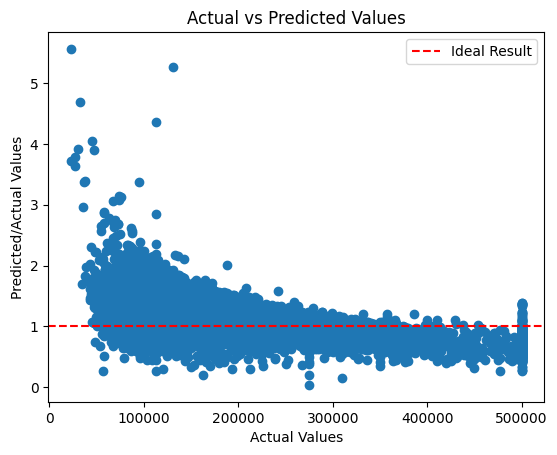

In [88]:
plt.scatter(y_test, y_pred/y_test)
plt.axhline(y=1, color='r', linestyle='--', label = 'Ideal Result')
plt.xlabel('Actual Values')
plt.ylabel('Predicted/Actual Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Let us see the overall distribution of the predicted value of the model in terms of ratio.

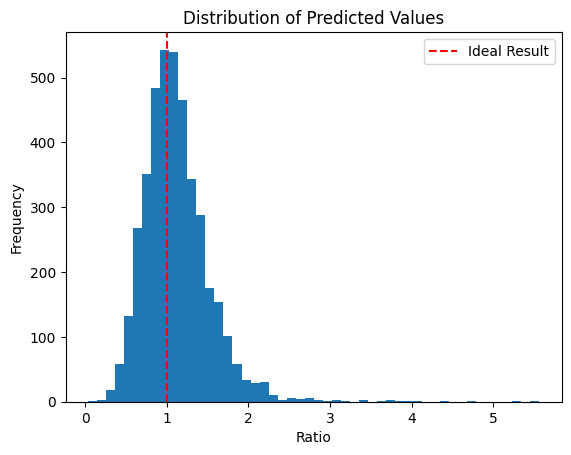

In [85]:
ratio = (y_pred/y_test)
plt.hist(ratio, bins=50)
plt.axvline(x=1, color='r', linestyle='--', label = 'Ideal Result')
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

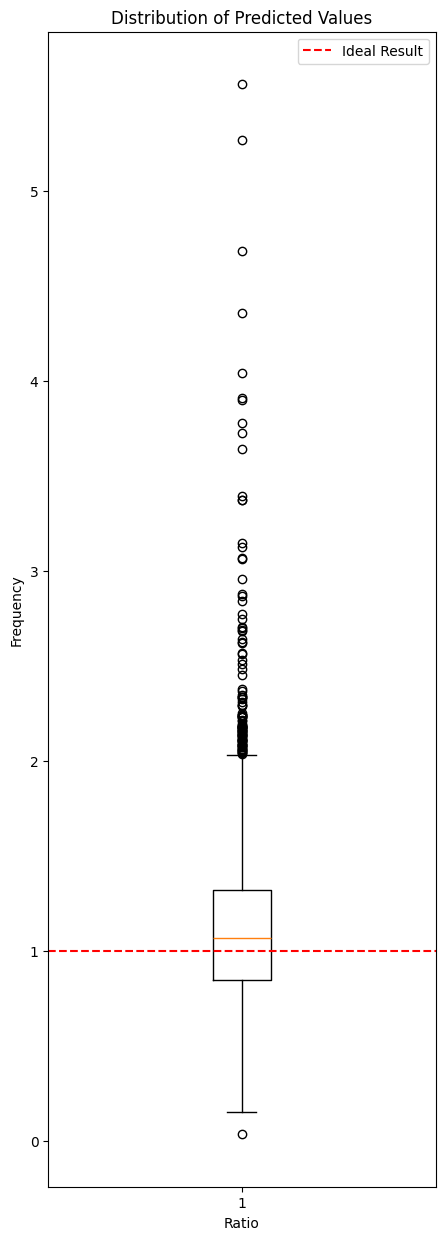

In [91]:
plt.figure(figsize=(5, 15))
plt.boxplot(ratio)
plt.axhline(y=1, color='r', linestyle='--', label = 'Ideal Result')
plt.legend()
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

# Summary of Learning:


*   Loading the data from online
*   Data Preparation

*   Filling the missing values
*   Looking the correlation between various features

*   Feature Engineering
*   Encoding the categorical data into numeric/boolean data

*   Splitting the data into train and test set
*   Training the model

*   Validating the model
*   Predicting the values using the trained model.











# References:

*   [artificial-intelligence-foundations-machine-learning-3067770
](https://github.com/LinkedInLearning/artificial-intelligence-foundations-machine-learning-3067770/blob/main/LiL-HomePrediction.ipynb)

